In [ ]:
import pandas as pd
import numpy as np
a = pd.read_excel('time_messagecount.xls',index_col=0)

b = np.array(a.fillna(1e-6))
b/b.sum(axis=0)

In [4]:
c = np.transpose(b)

In [ ]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=5,beta_loss='kullback-leibler',solver='mu')
nt = nmf.fit_transform(c)

In [53]:
nt

array([[3.98140270e-05, 3.92564538e-02, 1.81869871e-05, 0.00000000e+00,
        2.25166363e-01],
       [4.41177106e-06, 1.31273075e-02, 1.63654017e-05, 0.00000000e+00,
        2.60852582e-01],
       [1.10844822e-04, 2.34019562e-02, 1.05610511e-05, 0.00000000e+00,
        2.46676074e-01],
       [5.91923054e-06, 3.38749144e-02, 1.78818317e-05, 0.00000000e+00,
        2.32576674e-01],
       [5.71169959e-06, 3.99080345e-02, 1.98453176e-05, 0.00000000e+00,
        2.24357215e-01],
       [4.49648489e-06, 3.42792499e-02, 1.69893950e-05, 0.00000000e+00,
        2.32029486e-01],
       [1.10747591e-03, 3.63942045e-02, 8.02206961e-06, 0.00000000e+00,
        2.27226058e-01],
       [4.32902106e-06, 2.35687448e-02, 2.25454728e-05, 0.00000000e+00,
        2.46614748e-01],
       [9.82088796e-06, 4.82794185e-02, 1.20936858e-04, 0.00000000e+00,
        2.12816618e-01],
       [3.70531966e-04, 4.77492680e-02, 1.07661228e-05, 0.00000000e+00,
        2.13047860e-01],
       [7.60047713e-06, 6.6713

In [162]:
ages = np.argmax(nt,axis=1)+1
ages

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 6, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 1, 1, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 7, 7,
       7, 7, 7, 1, 7, 1, 1, 7, 7, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1,
       1, 3, 1, 8, 8, 1, 8, 8, 8, 8, 8, 8, 8, 6, 6, 6, 6, 6, 6, 6, 6, 3,
       6, 6, 3, 3, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype=int64)

In [163]:
last = 0
b_last = 0
for i in range(len(ages)):
    if ages[i]!= last and ages[i]!= b_last:
        print(i)
    b_last = last
    last = ages[i]

0
11
15
41
42
43
44
52
54
70
71
82
86
91
95
98
108
111
113
115
123
131
134
136


In [133]:
nmf.components_

(5, 695)

In [50]:
names = np.array(a.index)

In [8]:
import matplotlib.pyplot as plt
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.9, bottom=0.05, wspace=0.90, hspace=0.1)
    plt.show()

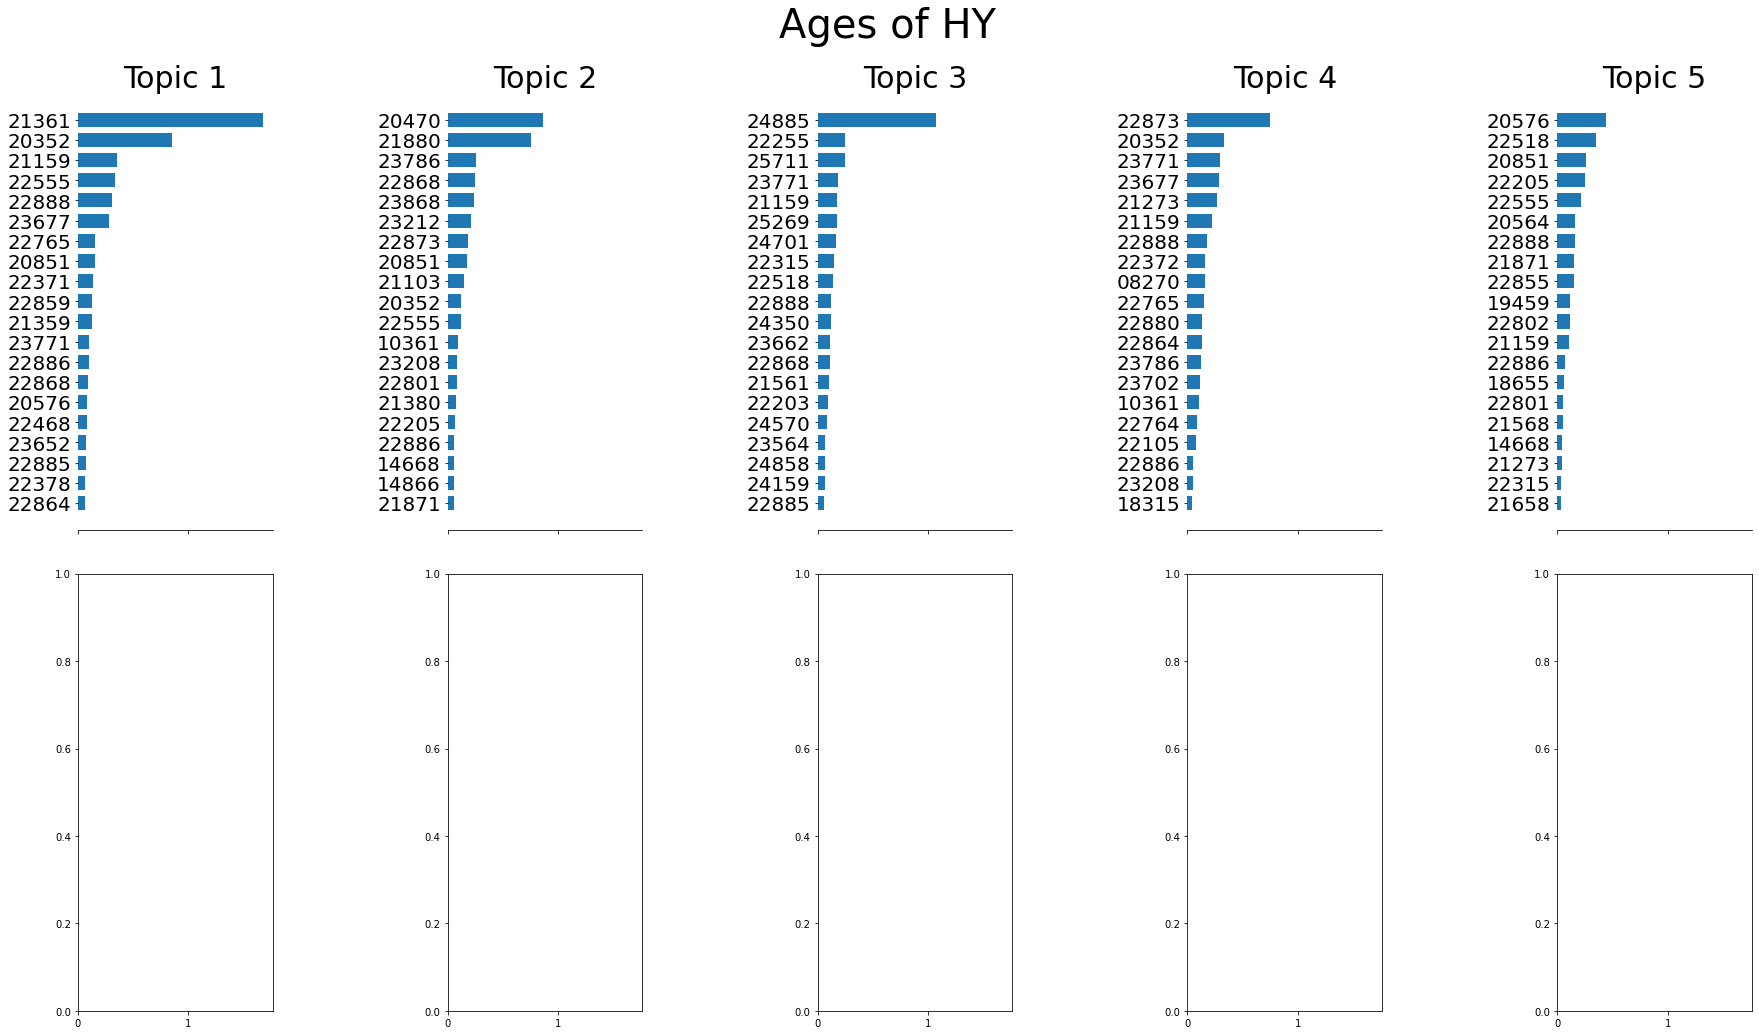

In [51]:
plot_top_words(nmf,names,20,'Ages of HY')

In [6]:
g = nt.transpose()
f = np.stack([np.convolve([0.25,0.25,0.25,0.25],g[i],'valid') for i in range(5)])

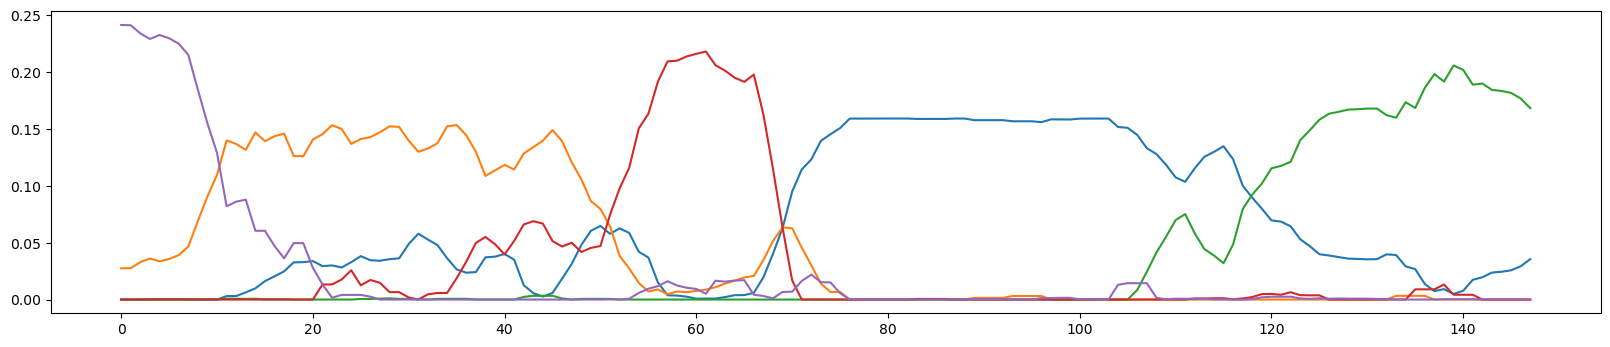

In [9]:
fig = plt.figure(figsize=(20,4),dpi=100)
plt.plot(f.transpose())

In [28]:
gener = np.transpose((f>0.005).astype('int32'))

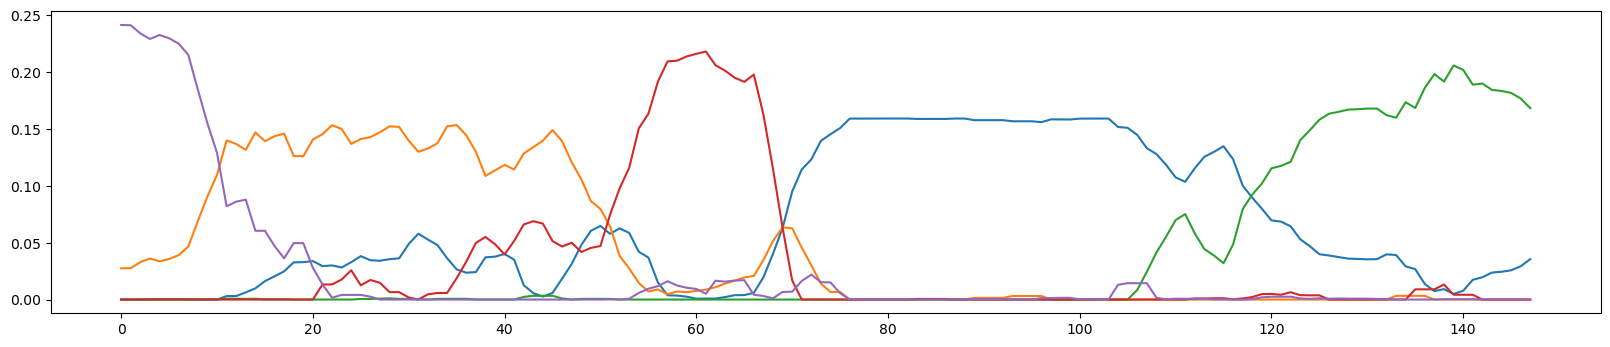

In [27]:
fig = plt.figure(figsize=(20,4),dpi=100)
plt.plot(f.transpose())

In [43]:
last=0
a = gener[:,2]
for i in range(len(a)):
    if a[i]!=last:
        print(i)
    last = a[i]

106
